# Introduction to pyTorch

### Graduating from ndarrays to tensors
### Use AutoGradientDescent to compute the gradient

In [140]:
import torch

In [ ]:
torch.sq # Tab (inteli-sense)

In [ ]:
torch.*Tensor? #What all are there?

In [ ]:
torch.nn.Module() #shift + Tab -> Documentation of the func

In [ ]:
torch.nn.Module?
torch.nn.Module??  # the underlying code 

### Let's start with tensors

In [101]:
t = torch.Tensor(2,3,4)
type(t) # what is my datatype ? how many bytes?

torch.FloatTensor

In [102]:
t.size()

torch.Size([2, 3, 4])

In [103]:
t.numel() # in a max of 24 dimensional space = 2 x 3 x 4

24

In [104]:
t.dim() # returns sub-dimensions

3

In [105]:
t # see the last line of the output below


(0 ,.,.) = 
  0.0000e+00 -1.5846e+29  2.8254e+16 -2.8601e-42
  8.4078e-45  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  1.8754e+28  1.2870e+22

(1 ,.,.) = 
  4.1727e+21  1.0471e-11  2.1124e+20  1.0524e+21
  6.6756e+22  6.3075e-10  1.7471e-04  6.9062e-07
  5.1436e-11  7.1450e+31  4.1418e-41  5.5101e-40
[torch.FloatTensor of size 2x3x4]

In [106]:
# _ "The" most imp concept, if you are deep learning aspirant
#_ -> inplace operation
t.random_(5)


(0 ,.,.) = 
  0  4  1  1
  2  1  4  0
  1  0  2  4

(1 ,.,.) = 
  0  2  1  2
  1  3  4  3
  2  4  1  4
[torch.FloatTensor of size 2x3x4]

In [107]:
#  now if say
r = t.resize_(3,8)
r


    0     4     1     1     2     1     4     0
    1     0     2     4     0     2     1     2
    1     3     4     3     2     4     1     4
[torch.FloatTensor of size 3x8]

In [108]:
t


    0     4     1     1     2     1     4     0
    1     0     2     4     0     2     1     2
    1     3     4     3     2     4     1     4
[torch.FloatTensor of size 3x8]

In [109]:
# see imp. as r points to t, hence in DL we won't overflow the in-memory/RAM
# by creating copies of data on memory
s =r.clone()

In [110]:
s.fill_(1)


    1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1
[torch.FloatTensor of size 3x8]

In [111]:
# Sometimes good to have copies, if we want to go back to prev. state
t # see didn't change


    0     4     1     1     2     1     4     0
    1     0     2     4     0     2     1     2
    1     3     4     3     2     4     1     4
[torch.FloatTensor of size 3x8]

In [112]:
r.zero_()


    0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0
[torch.FloatTensor of size 3x8]

In [113]:
t # see it changed!


    0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0
[torch.FloatTensor of size 3x8]

### Tensor- Vectors (1D Tensor)

In [114]:
v = torch.Tensor([1, 2, 3, 4]);v


 1
 2
 3
 4
[torch.FloatTensor of size 4]

In [115]:
v.dim()

1

In [116]:
v.numel()

4

In [160]:
w = torch.Tensor([1,0,2,0]); w


 1
 0
 2
 0
[torch.FloatTensor of size 4]

In [162]:
v * w


 1
 0
 6
 0
[torch.FloatTensor of size 4]

In [161]:
v @ w

0.0

In [125]:
x = torch.Tensor(5).random_(5); x


 0
 3
 4
 1
 4
[torch.FloatTensor of size 5]

In [127]:
print(x[0], x[-1]) # 1st & last

0.0 4.0


In [130]:
x[0:2] # always range -1


 0
 3
[torch.FloatTensor of size 2]

In [138]:
y = torch.arange(1,4);y # Use shift+Tab to see what is arange


 1
 2
 3
[torch.FloatTensor of size 3]

### Tensor Matrices (2D Tensors)

In [141]:
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]]); m


 2  5  3  7
 4  2  1  9
[torch.FloatTensor of size 2x4]

In [148]:
print(m.dim(), m.numel(), m.size()[0], m.size()[1], sep=", ")

2, 8, 2, 4


In [154]:
print(m[0,2], m[0][2]) # accessing an element, use either way

3.0 3.0


In [153]:
print(m[:,1])


 5
 2
[torch.FloatTensor of size 2]



In [156]:
print(m[:,[1]]) # note the type, last line


 5
 2
[torch.FloatTensor of size 2x1]



In [157]:
m @ v 
# 2*1 + 5*2 + 3*3 +7*4 
# 4*1 + 2*2 + 1*3 + 9*4


 49
 47
[torch.FloatTensor of size 2]

In [167]:
m+ torch.rand(2,4)


 2.1196  5.6785  3.5755  7.0629
 4.4850  2.9443  1.8896  9.1045
[torch.FloatTensor of size 2x4]

In [169]:
m.t() # transpose


 2  4
 5  2
 3  1
 7  9
[torch.FloatTensor of size 4x2]

In [196]:
torch.eye(3) #identity matrix


 1  0  0
 0  1  0
 0  0  1
[torch.FloatTensor of size 3x3]

In [197]:
torch.ones(3,5)


 1  1  1  1  1
 1  1  1  1  1
 1  1  1  1  1
[torch.FloatTensor of size 3x5]

In [199]:
torch.arange(3,5)


 3
 4
[torch.FloatTensor of size 2]

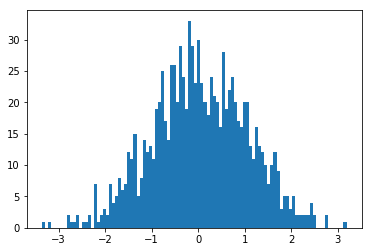

In [192]:
%matplotlib inline
from matplotlib import pyplot as plt
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100); # randn returns tensor filled with random from uniform distribution

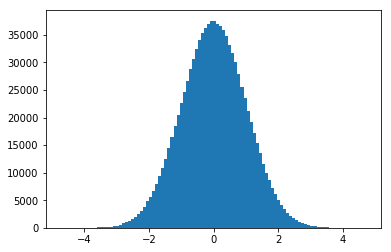

In [187]:
plt.hist(torch.randn(10**6).numpy(), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF! 

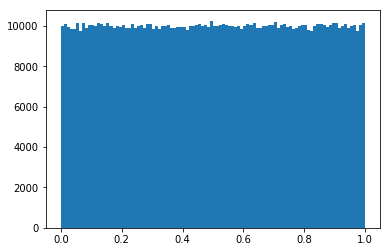

In [200]:
plt.hist(torch.rand(10**6).numpy(), 100); # rand returns tensor filled with random numbers from uniform distribution

In [211]:
if torch.cuda.is_available(): # if you have gpu, delegate the task to it
    m.cuda()